<a href="https://colab.research.google.com/github/eliashossain001/Diabetes-Prediction-of-India-/blob/master/Diabetes_Prediction_PDA_v2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
# from google.colab import drive
# drive.mount('/gdrive', force_remount=True) 

In [3]:
# Load dataset
def load_data():
    data =pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Data/dataset/diabetes.csv", engine='python')
    return data

In [4]:
df = load_data()
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


In [5]:
df.shape

(768, 9)

In [6]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

**Exploratory Data Analysis**

In [7]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import io
import matplotlib.mlab as mlab
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

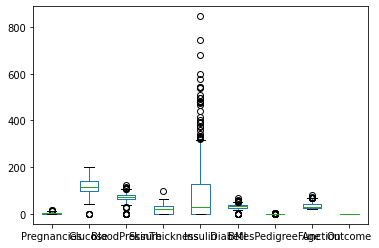

In [8]:
df.plot(kind='box')
plt.show()

In [9]:
df.describe(include='all')

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
#Check the total pregnancy

/usr/local/lib/python3.6/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


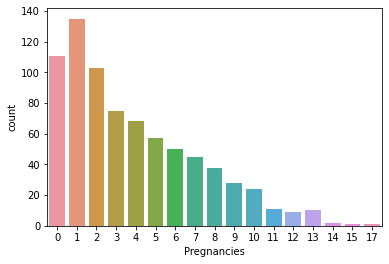

In [11]:
plot = sns.countplot(df["Pregnancies"])

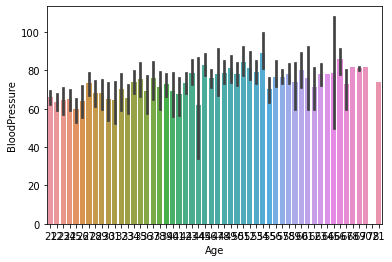

In [12]:
plot = sns.barplot(x=df["Age"], 
                   y=df["BloodPressure"])

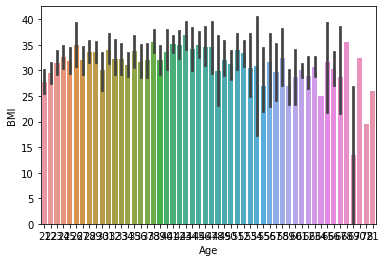

In [13]:
plot = sns.barplot(x=df["Age"], 
                   y=df["BMI"])

In [14]:
#Add heatmap

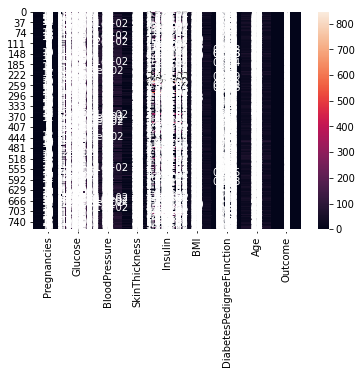

In [15]:
sns.heatmap(df, annot=True)

In [16]:
#Ad clustermap

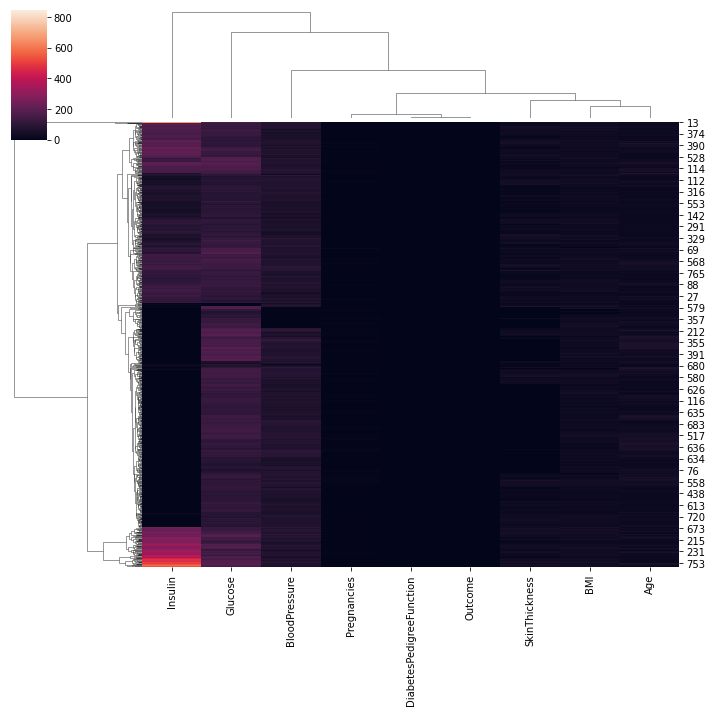

In [17]:
sns.clustermap(df)

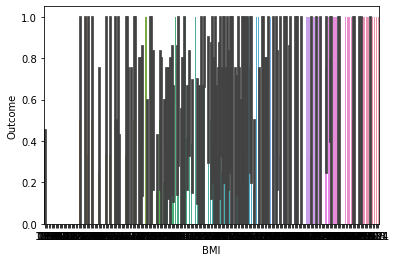

In [18]:
plot = sns.barplot(x=df["BMI"], 
                   y=df["Outcome"])

**Distribution plot**

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


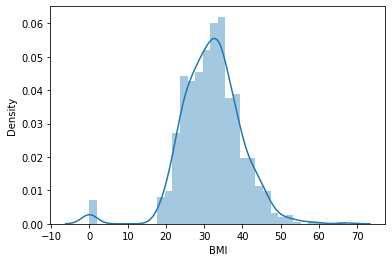

In [19]:
plot = sns.distplot(df["BMI"],
                    hist=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


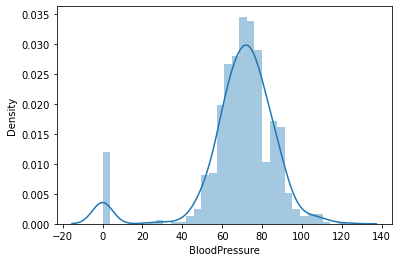

In [20]:
plot = sns.distplot(df["BloodPressure"],
                    hist=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


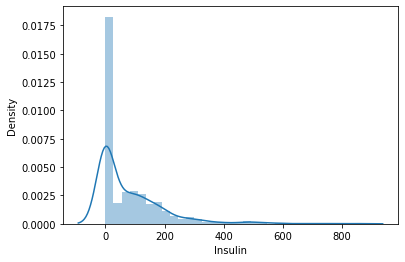

In [21]:
plot = sns.distplot(df["Insulin"],
                    hist=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


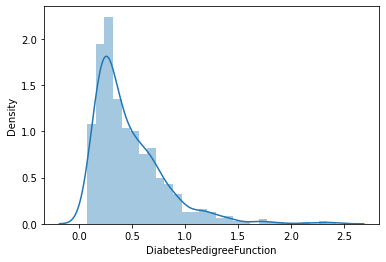

In [22]:
plot = sns.distplot(df["DiabetesPedigreeFunction"],
                    hist=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


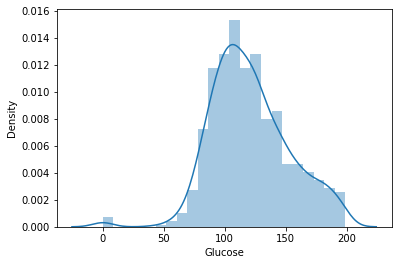

In [23]:
plot = sns.distplot(df["Glucose"],
                    hist=True)

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


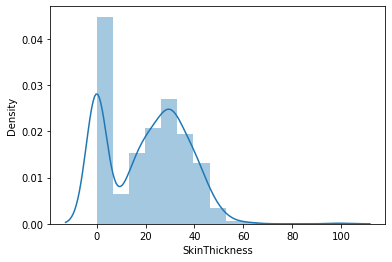

In [24]:
plot = sns.distplot(df["SkinThickness"],
                    hist=True)

In [45]:
df.head(2)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0


**Coorelation analysis**

In [46]:
# calculate correlaiton
corr = df.drop(["DiabetesPedigreeFunction","Pregnancies", "SkinThickness"], axis = 1).corr()

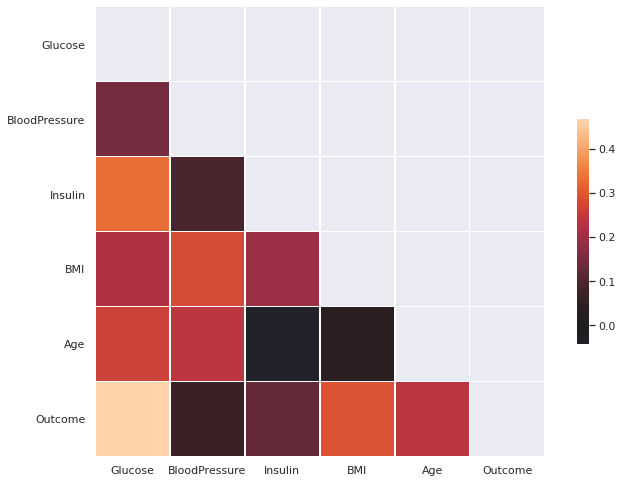

In [47]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
mask = np.triu(np.ones_like(corr, dtype=np.bool))
sns.heatmap(corr,center=0,mask=mask,
            square=True, linewidths=.5, cbar_kws={"shrink": .5});

**Number of pregnancies death by diabetes**

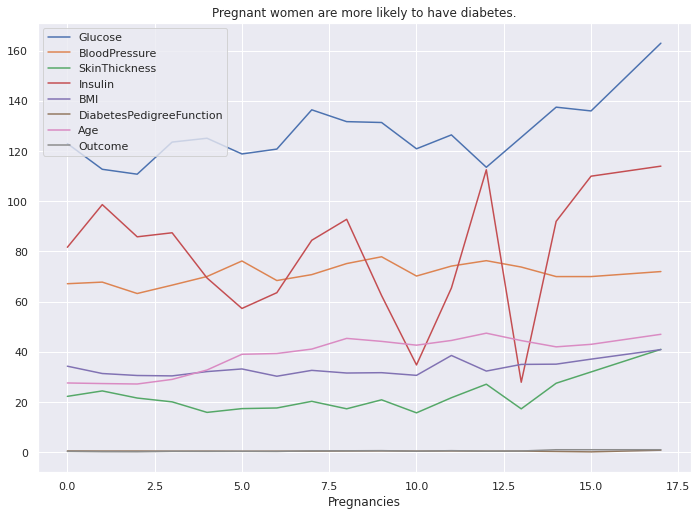

In [53]:
df.groupby('Pregnancies').mean().plot()
plt.title("Pregnant women are more likely to have diabetes.");

**Define the independent and dependent variable**

In [25]:
input_data= df.drop('Outcome', axis='columns')
target= df['Outcome']
#input_data

**Train test split**

In [26]:
X_train, X_test, y_train, y_test= train_test_split(input_data,target, test_size=0.8, random_state=4)

In [27]:
import matplotlib.pyplot as plt
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Logistic Regression

In [28]:
logistic_regression= LogisticRegression()
logistic_regression.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [29]:

print('Coefficients:', logistic_regression.coef_)
print('Intercept:', logistic_regression.intercept_)
 
predictions = logistic_regression.predict(X_test)
print('Classification Report:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test,predictions ))

Coefficients: [[ 0.1826528   0.0352135  -0.0089787   0.02958433 -0.00607275  0.05711567
   1.12685932 -0.00183896]]
Intercept: [-7.46826024]
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.86      0.83       399
           1       0.69      0.60      0.64       216

    accuracy                           0.77       615
   macro avg       0.75      0.73      0.73       615
weighted avg       0.76      0.77      0.76       615

Confusion Matrix:
 [[342  57]
 [ 87 129]]
Accuracy Score: 0.7658536585365854
Precision: 0.6935483870967742
Recall: 0.5972222222222222


Decision tree classifier 

In [30]:
model_decision_tree=DecisionTreeClassifier()
model_decision_tree.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [31]:
tree_predictions = model_decision_tree.predict(X_test)
print('Classification Report:\n',classification_report(y_test, tree_predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, tree_predictions))
print('Accuracy Score:',accuracy_score(y_test, tree_predictions))
print("Precision:",metrics.precision_score(y_test, tree_predictions))
print("Recall:",metrics.recall_score(y_test,tree_predictions ))

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.71      0.75       399
           1       0.55      0.64      0.59       216

    accuracy                           0.69       615
   macro avg       0.67      0.68      0.67       615
weighted avg       0.70      0.69      0.69       615

Confusion Matrix:
 [[285 114]
 [ 77 139]]
Accuracy Score: 0.6894308943089431
Precision: 0.549407114624506
Recall: 0.6435185185185185


Random Forest classifier 

In [32]:
random_forest = RandomForestClassifier(n_estimators=10, max_depth=5, random_state=0)
random_forest.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=5, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)

In [33]:
random_pred = random_forest.predict(X_test)
print(classification_report(y_test, random_pred))
print('\nAccuracy: {0:.4f}'.format(accuracy_score(y_test, random_pred)))
print('Confusion Matrix:\n',confusion_matrix(y_test, random_pred))

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       399
           1       0.63      0.49      0.55       216

    accuracy                           0.72       615
   macro avg       0.69      0.67      0.67       615
weighted avg       0.71      0.72      0.71       615


Accuracy: 0.7203
Confusion Matrix:
 [[338  61]
 [111 105]]


**Naive bayes algorithm: GaussianNB**

In [34]:
model=GaussianNB()
model.fit(X_train,y_train)
predictions = model.predict(X_test)

In [35]:
print('Classification Report:\n',classification_report(y_test, predictions))
print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test,predictions ))

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.82      0.81       399
           1       0.65      0.61      0.63       216

    accuracy                           0.75       615
   macro avg       0.73      0.72      0.72       615
weighted avg       0.75      0.75      0.75       615

Confusion Matrix:
 [[329  70]
 [ 84 132]]
Accuracy Score: 0.7495934959349594
Precision: 0.6534653465346535
Recall: 0.6111111111111112


Naive bayes algorithm: Multinomial NB

In [36]:
classifier=MultinomialNB()
classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [37]:
predictions = classifier.predict(X_test)
print('Classification Report:\n',classification_report(y_test, predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, predictions))
print('Accuracy Score:',accuracy_score(y_test, predictions))
print("Precision:",metrics.precision_score(y_test, predictions))
print("Recall:",metrics.recall_score(y_test,predictions ))

Classification Report:
               precision    recall  f1-score   support

           0       0.70      0.72      0.71       399
           1       0.46      0.44      0.45       216

    accuracy                           0.62       615
   macro avg       0.58      0.58      0.58       615
weighted avg       0.62      0.62      0.62       615

Confusion Matrix:
 [[287 112]
 [121  95]]
Accuracy Score: 0.6211382113821138
Precision: 0.45893719806763283
Recall: 0.4398148148148148


Support Vector Machine algorithm

In [38]:
clf_svm = svm.SVC(C=10, kernel='linear',probability=True) 
clf_svm.fit(X_train,y_train) 

SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

In [39]:
svm_predictions = clf_svm.predict(X_test)
print('Classification Report:\n',classification_report(y_test, svm_predictions))
print('Confusion Matrix:\n',confusion_matrix(y_test, svm_predictions))
print('Accuracy Score:',accuracy_score(y_test, svm_predictions))
print("Precision:",metrics.precision_score(y_test, svm_predictions))
print("Recall:",metrics.recall_score(y_test,svm_predictions ))

Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.87      0.83       399
           1       0.70      0.56      0.62       216

    accuracy                           0.76       615
   macro avg       0.74      0.71      0.72       615
weighted avg       0.75      0.76      0.75       615

Confusion Matrix:
 [[348  51]
 [ 96 120]]
Accuracy Score: 0.7609756097560976
Precision: 0.7017543859649122
Recall: 0.5555555555555556


Confusion matrix of SVM

accuracy:  0.761
Confusion matrix, without normalization


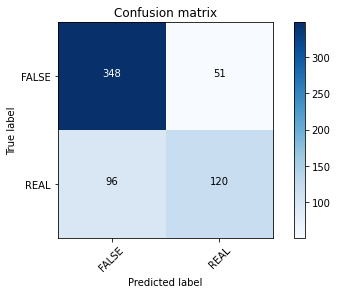

In [40]:
import numpy as np
import itertools
clf_svm.fit(X_train, y_train)
cl_pred = clf_svm.predict(X_test)
score = metrics.accuracy_score(y_test, cl_pred)
print("accuracy:  %0.3f" % score)
cm = metrics.confusion_matrix(y_test, cl_pred)
plot_confusion_matrix(cm, classes=['FALSE', 'REAL'])

ROC-AUC curve

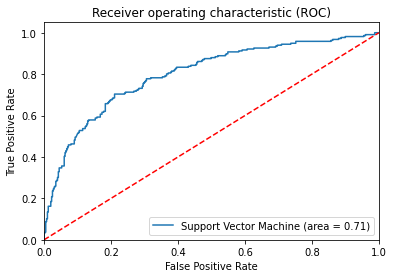

In [41]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

svm_roc_auc = roc_auc_score(y_test, clf_svm.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, clf_svm.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Support Vector Machine (area = %0.2f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC)')
plt.legend(loc="lower right")
plt.savefig('SVM_ROC')
plt.show()

K-FOLD cross validiation of SVM

In [42]:
from sklearn.model_selection import cross_validate
cv_svm= cross_validate(clf_svm, input_data, target, cv=10)
print(cv_svm['test_score'])
print(cv_svm['test_score'].mean())

[0.71428571 0.77922078 0.79220779 0.74025974 0.75324675 0.75324675
 0.80519481 0.79220779 0.75       0.81578947]
0.7695659603554341


In [64]:
model_score= pd.DataFrame(cv_svm)
model_score

,fit_time,score_time,test_score
0,175.792495,0.002028,0.714286
1,153.621851,0.003223,0.779221
2,169.662318,0.002515,0.792208
3,161.630999,0.002058,0.740260
4,116.219155,0.001896,0.753247
5,117.683979,0.001929,0.753247
6,157.764135,0.001913,0.805195
7,137.739235,0.001922,0.792208
8,117.770095,0.002128,0.750000
9,177.881577,0.001810,0.815789


Passive aggressive classifier

In [43]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=1000, random_state=0,tol=1e-3)
linear_clf.fit(X_train, y_train)

PassiveAggressiveClassifier(C=1.0, average=False, class_weight=None,
                            early_stopping=False, fit_intercept=True,
                            loss='hinge', max_iter=1000, n_iter_no_change=5,
                            n_jobs=None, random_state=0, shuffle=True,
                            tol=0.001, validation_fraction=0.1, verbose=0,
                            warm_start=False)

In [44]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix,accuracy_score
from sklearn import metrics
pac_predictions = linear_clf.predict(X_test)
print('Classification Report:\n',classification_report(y_test, pac_predictions))

print('Confusion Matrix:\n',confusion_matrix(y_test, pac_predictions))
print('Accuracy Score:',accuracy_score(y_test, pac_predictions))
print("Precision:",metrics.precision_score(y_test, pac_predictions))
print("Recall:",metrics.recall_score(y_test,pac_predictions ))

Classification Report:
               precision    recall  f1-score   support

           0       0.65      0.99      0.79       399
           1       0.57      0.02      0.04       216

    accuracy                           0.65       615
   macro avg       0.61      0.51      0.41       615
weighted avg       0.62      0.65      0.52       615

Confusion Matrix:
 [[396   3]
 [212   4]]
Accuracy Score: 0.6504065040650406
Precision: 0.5714285714285714
Recall: 0.018518518518518517
